<a href="https://colab.research.google.com/github/pragneshrana/WorkSample/blob/main/Reliability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reliability




Goal was to predict,
- Next best duration for servicing/Change of parts
- Identify potential failure modes and their causes
- Data Analysis

Data:
Parameters:
- Number of total components
- Number of support (legs)
- Materical Quality (Avg, Good, Excellent)
- Number Joints
- Number of nuts
- Number of bolts
- Size of nuts (1/4", 3/6" etc)
- Type of motors
- RPM of motors
- Number of hours usage
- Humadity (Surrounding of machine)
- Temperature (Surrounding of machine)
- Input Load
- Usage of Vibration absrober
- Area Covered
- Day since last service
- Day purchase since
- Failure (Year after duration)

In [ ]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 50)


### Data Creation (Dummy)


In [ ]:
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Define the number of data points
dataPoints = 500

# Number of total components
num_total_comp = np.round(np.random.normal(loc=350, scale=50, size=dataPoints))

# Number of support (legs)
num_legs = np.round(np.random.normal(loc=7, scale=1, size=dataPoints))

# Material Quality (Avg, Good, Excellent)
mate_quali = np.random.choice(['Avg', 'Good', 'Excellent'], size=dataPoints)

# Number Joints
total_joint = np.round(num_total_comp / 3)

# Number of nuts
total_nuts = np.round(num_total_comp / 8)

# Number of bolts
total_bolts = np.round(total_nuts * 1.5)

# Size of nuts (1/4", 3/6" etc)
size_nuts = [['1/4', '1/2', '3/6']] * dataPoints

# Quantity of each size of nuts
quant_size_nuts = np.column_stack([
    np.round(total_nuts * 0.2),
    np.round(total_nuts * 0.5),
    np.round(total_nuts * 0.3)
])


# Convert quant_size_nuts to a list
quant_size_nuts = quant_size_nuts.tolist()

# Number of motors
num_motors = np.random.choice([1, 2, 3], size=dataPoints)

# Number of belts
num_belts = np.round(np.random.uniform(1, 5, size=dataPoints))

# Type of motors
motor_type = np.random.choice(['Induction', 'DC', 'Servo', 'Stepper'], size=dataPoints)

# RPM of motors
motor_rpmm = np.random.choice([2000, 5000, 10000, 4000], size=dataPoints)

# Number of hours usage per day
usage_per_day = np.round(np.random.uniform(8, 24, size=dataPoints))

# Humidity (Surrounding of machine) -- Avg Value
humidity = np.round(np.random.uniform(40, 100, size=dataPoints))

# Temperature (Surrounding of machine) (degree C) -- Avg Value
temperature = np.round(np.random.uniform(20, 60, size=dataPoints))

# Input Load (Kg)
input_load = np.round(np.random.uniform(100, 1000, size=dataPoints))

# Usage of Vibration absorber
vibr_abosrb = np.random.choice([0, 1], size=dataPoints)

# Area Covered (sq_ft)
area_covered = np.round(np.random.uniform(100, 1000, size=dataPoints))

# Days since last service
last_service = np.round(np.random.uniform(90, 700, size=dataPoints))

# Days purchase since
purchase_since = np.round(np.random.uniform(1, 1500, size=dataPoints))

# Failure (Days after duration) -- Failure of any part
# failure = np.round(np.random.uniform(200, 1000, size=dataPoints))
#Dummy data for some good fit
failure = np.round(377.1549 +
                   140.8465 * (mate_quali == 'Avg') +
                   116.7542 * (mate_quali == 'Excellent') +
                   119.5543 * (mate_quali == 'Good') +
                   127.0469 * (motor_type == 'DC') +
                   79.3916 * (motor_type == 'Induction') +
                   77.6235 * (motor_type == 'Servo') +
                   93.0929 * (motor_type == 'Stepper') +
                   np.random.normal(loc=0, scale=50, size=dataPoints))

In [ ]:
# Create a dictionary with the generated data
data = {
    'num_total_comp': num_total_comp,
    'num_legs': num_legs,
    'mate_quali': mate_quali,
    'total_joint': total_joint,
    'total_nuts': total_nuts,
    'total_bolts': total_bolts,
    'size_nuts': size_nuts,
    'quant_size_nuts': quant_size_nuts,
    'num_motors': num_motors,
    'num_belts': num_belts,
    'motor_type': motor_type,
    'motor_rpmm': motor_rpmm,
    'usage_per_day': usage_per_day,
    'humidity': humidity,
    'temperature': temperature,
    'input_load': input_load,
    'vibr_abosrb': vibr_abosrb,
    'area_covered': area_covered,
    'last_service': last_service,
    'purchase_since': purchase_since,
    'failure': failure
}

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head()


,num_total_comp,num_legs,mate_quali,total_joint,total_nuts,total_bolts,size_nuts,quant_size_nuts,num_motors,num_belts,motor_type,motor_rpmm,usage_per_day,humidity,temperature,input_load,vibr_abosrb,area_covered,last_service,purchase_since,failure
0,375.0,8.0,Excellent,125.0,47.0,70.0,"[1/4, 1/2, 3/6]","[9.0, 24.0, 14.0]",3,1.0,Servo,10000,14.0,41.0,59.0,916.0,1,370.0,154.0,1198.0,558.0
1,343.0,9.0,Avg,114.0,43.0,64.0,"[1/4, 1/2, 3/6]","[9.0, 22.0, 13.0]",2,4.0,Servo,4000,11.0,87.0,42.0,992.0,0,527.0,348.0,1061.0,657.0
2,382.0,6.0,Excellent,127.0,48.0,72.0,"[1/4, 1/2, 3/6]","[10.0, 24.0, 14.0]",2,2.0,Stepper,2000,21.0,77.0,31.0,287.0,1,251.0,575.0,286.0,547.0
3,426.0,8.0,Avg,142.0,53.0,80.0,"[1/4, 1/2, 3/6]","[11.0, 26.0, 16.0]",2,3.0,Servo,10000,20.0,82.0,48.0,420.0,1,419.0,176.0,551.0,605.0
4,338.0,6.0,Excellent,113.0,42.0,63.0,"[1/4, 1/2, 3/6]","[8.0, 21.0, 13.0]",1,2.0,Induction,2000,14.0,90.0,31.0,702.0,1,460.0,169.0,160.0,540.0


## Features

In [ ]:
# Convert quant_size_nuts to a DataFrame
df_quant_size_nuts = pd.DataFrame(quant_size_nuts, columns=['quit_size_nuts_1_4', 'quit_size_nuts_1_2', 'quit_size_nuts_3_6'])

# Concatenate the original DataFrame with the quant_size_nuts DataFrame
df = pd.concat([df, df_quant_size_nuts], axis=1)
df = df.drop(['size_nuts', 'quant_size_nuts'], axis=1)


In [ ]:
# Assuming df is your DataFrame
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

# Print or use the lists as needed
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: ['mate_quali', 'motor_type']
Numerical Features: ['num_total_comp', 'num_legs', 'total_joint', 'total_nuts', 'total_bolts', 'num_motors', 'num_belts', 'motor_rpmm', 'usage_per_day', 'humidity', 'temperature', 'input_load', 'vibr_abosrb', 'area_covered', 'last_service', 'purchase_since', 'failure', 'quit_size_nuts_1_4', 'quit_size_nuts_1_2', 'quit_size_nuts_3_6']


In [ ]:
df = pd.get_dummies(df, columns=['mate_quali'], prefix='mate_quali')
df = pd.get_dummies(df, columns=['motor_type'], prefix='motor_type')
df


,num_total_comp,num_legs,total_joint,total_nuts,total_bolts,num_motors,num_belts,motor_rpmm,usage_per_day,humidity,temperature,input_load,vibr_abosrb,area_covered,last_service,purchase_since,failure,quit_size_nuts_1_4,quit_size_nuts_1_2,quit_size_nuts_3_6,mate_quali_Avg,mate_quali_Excellent,mate_quali_Good,motor_type_DC,motor_type_Induction,motor_type_Servo,motor_type_Stepper
0,375.0,8.0,125.0,47.0,70.0,3,1.0,10000,14.0,41.0,59.0,916.0,1,370.0,154.0,1198.0,558.0,9.0,24.0,14.0,0,1,0,0,0,1,0
1,343.0,9.0,114.0,43.0,64.0,2,4.0,4000,11.0,87.0,42.0,992.0,0,527.0,348.0,1061.0,657.0,9.0,22.0,13.0,1,0,0,0,0,1,0
2,382.0,6.0,127.0,48.0,72.0,2,2.0,2000,21.0,77.0,31.0,287.0,1,251.0,575.0,286.0,547.0,10.0,24.0,14.0,0,1,0,0,0,0,1
3,426.0,8.0,142.0,53.0,80.0,2,3.0,10000,20.0,82.0,48.0,420.0,1,419.0,176.0,551.0,605.0,11.0,26.0,16.0,1,0,0,0,0,1,0
4,338.0,6.0,113.0,42.0,63.0,1,2.0,2000,14.0,90.0,31.0,702.0,1,460.0,169.0,160.0,540.0,8.0,21.0,13.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,377.0,7.0,126.0,47.0,70.0,2,2.0,2000,19.0,87.0,36.0,294.0,1,371.0,580.0,623.0,618.0,9.0,24.0,14.0,1,0,0,0,0,0,1
496,298.0,9.0,99.0,37.0,56.0,2,3.0,10000,15.0,58.0,25.0,971.0,1,269.0,184.0,135.0,480.0,7.0,18.0,11.0,1,0,0,0,0,1,0
497,340.0,8.0,113.0,42.0,63.0,3,1.0,4000,19.0,42.0,26.0,744.0,1,373.0,314.0,657.0,553.0,8.0,21.0,13.0,0,1,0,0,0,1,0
498,306.0,6.0,102.0,38.0,57.0,1,3.0,2000,21.0,75.0,58.0,961.0,1,184.0,318.0,347.0,708.0,8.0,19.0,11.0,0,1,0,0,1,0,0


In [ ]:
columns = list(df.columns)
target = 'failure'
feat_cols = [col for col in columns if col != target]


In [ ]:
X = df[feat_cols]
y = df[target]

### Train-Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (400, 26)
X_test shape: (100, 26)
y_train shape: (400,)
y_test shape: (100,)


### **Linear regression**

 - It is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables.
 - It assumes a linear connection, expressing the dependent variable as a linear combination of the independent variables.
 - The goal is to find the best-fit line that minimizes the sum of squared differences between the predicted and observed values.
 - Linear regression is widely employed in various fields for prediction, understanding relationships, and making inferences based on data.


**Linear Regression Formula:**

For multiple linear regression with \(n\) independent variables:

$
y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \ldots + \beta_n \cdot x_n + \epsilon
$


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Add a constant term to the independent variables matrix for statsmodels
X_train_lr = sm.add_constant(X_train) #lr=linear regression
X_test_lr = sm.add_constant(X_test) #lr=linear regression


In [ ]:
#removing highly correlated features
print(X_train_lr.shape)

#Calculate the correlation matrix
correlation_matrix = X_train_lr.corr()

#Identify highly correlated features
correlation_threshold = 0.8
highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

#Drop highly correlated features from both training and testing sets
X_train_lr = X_train_lr.drop(columns=highly_correlated_features)
X_test_lr = X_test_lr.drop(columns=highly_correlated_features)

print(X_train_lr.shape)


(400, 27)
(400, 21)


In [ ]:
# Fit the linear regression model
model = sm.OLS(y_train, X_train_lr).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                failure   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     6.415
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           6.43e-14
Time:                        21:31:21   Log-Likelihood:                -2130.2
No. Observations:                 400   AIC:                             4298.
Df Residuals:                     381   BIC:                             4374.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  370.3346 

#### **Removing columns with high p value**




In [ ]:
# Iteratively remove columns with p-values > 0.05
while model.pvalues.max() > 0.05:
    # Identify the column with the highest p-value
    max_pvalue_column = model.pvalues.idxmax()

    # Remove the corresponding column from X
    X_train_lr = X_train_lr.drop(columns=[max_pvalue_column])

    # Refit the model
    model = sm.OLS(y_train, X_train_lr).fit()

# Display the final model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                failure   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           1.05e-18
Time:                        21:31:22   Log-Likelihood:                -2135.7
No. Observations:                 400   AIC:                             4283.
Df Residuals:                     394   BIC:                             4307.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  376.3675 

#### **Model Explanation:**



- Dependent Variable (Dep. Variable): failure: This is the dependent variable being predicted or explained by the independent variables.

- Model Information (Model):
  - OLS: Indicates that Ordinary Least Squares regression was used.

  - R-squared (R-squared):
      - Definition: R-squared is a measure of how well the independent variables explain the variability in the dependent variable.
      - Interpretation: In this case, approximately 21.1% of the variability in the failure variable is explained by the independent variables in the model.

  - Adjusted R-squared (Adj. R-squared):
      - Definition: Adjusted R-squared considers the number of predictors in the model, adjusting for the possibility of overfitting.
      - Interpretation: Adjusted R-squared is 20.1%, providing a more conservative measure of goodness of fit.

  - F-statistic (F-statistic):
      - Definition: It tests the overall significance of the model.
      - Interpretation: A high F-statistic (21.10) with a low associated p-value (1.05e-18) indicates that the overall model is statistically significant.

  -  Number of Observations (No. Observations):
      - Indicates the number of data points used in the analysis (400 observations).

  - Degrees of Freedom (Df Residuals and Df Model):
      - Df Residuals: The degrees of freedom of the residuals (400 - 5 = 394).
      - Df Model: The degrees of freedom of the model (5 predictors).

  - Covariance Type (Covariance Type):
      - Indicates the type of covariance estimation used in the model (nonrobust).

  - Co-efficient Table (coef):
      - Interpretation: These are the estimated coefficients for each predictor variable in the model.
      - For example, the constant term (const) is 376.3675, and it represents the estimated value of the dependent variable when all predictor variables are zero.

  - Standard Error (std err):
      - Indicates the standard error of the coefficient estimates.

  - t-Statistic (t):
      - Interpretation: It measures how many standard errors the coefficient is away from zero.
      - For instance, the t-statistic for mate_quali_Avg is 39.676.

  - P-value (P>|t|):
      - Interpretation: A low p-value (typically < 0.05) suggests that the corresponding coefficient is statistically significant.

  - 95% Confidence Interval ([0.025, 0.975]):
      - Provides a range within which the true coefficient is likely to fall with 95% confidence.

  - Diagnostic Tests (Omnibus, Durbin-Watson, Prob(Omnibus), Jarque-Bera, Skew, Prob(JB), Kurtosis, Cond. No.): These tests assess the assumptions and diagnostic aspects of the regression model.

    - Omnibus Test (Omnibus):
      - Definition: The Omnibus test is a test for the overall goodness of fit of the model.
      - Interpretation: In this context, an Omnibus test p-value of 0.633 is reported. A higher p-value suggests that the model's residuals (the differences between observed and predicted values) are normally distributed. A low p-value might indicate a departure from normality.

    - Durbin-Watson Statistic (Durbin-Watson):
      - Definition: The Durbin-Watson statistic tests for the presence of autocorrelation in the residuals.
      - Interpretation: The reported value of 2.006 is close to 2, which is the expected value for uncorrelated residuals. Values significantly different from 2 might suggest autocorrelation.

    - Probability of Omnibus Test (Prob(Omnibus)):
      - Definition: This is the probability associated with the Omnibus test.
      - Interpretation: A p-value of 0.633 suggests that there is no strong evidence to reject the null hypothesis that the residuals are normally distributed.

    - Jarque-Bera Test (Jarque-Bera):
      - Definition: The Jarque-Bera test is another test for the normality of residuals.
      - Interpretation: The reported JB statistic is 0.692, and the associated p-value is 0.707. Similar to the Omnibus test, a higher p-value suggests that the residuals are normally distributed.

    - Skewness (Skew):
      - Definition: Skewness measures the asymmetry of the residuals distribution.
      - Interpretation: A skewness close to zero (0.051 in this case) indicates that the residuals are approximately symmetrically distributed.

    - Probability of Jarque-Bera Test (Prob(JB)):
      - Definition: This is the probability associated with the Jarque-Bera test.
      - Interpretation: A p-value of 0.707 further supports the idea that the residuals follow a normal distribution.

    - Kurtosis (Kurtosis):
      - Definition: Kurtosis measures the tailedness of the residuals distribution.
      - Interpretation: A kurtosis of 3.177 suggests that the distribution is relatively normal. Deviations from 3 may indicate more or less heavy tails.

    - Condition Number (Cond. No.):
      - Definition: The condition number assesses multicollinearity in the model.
      - Interpretation: A very high condition number (9.21e+15 in this case) might indicate potential multicollinearity problems. High condition numbers suggest that the design matrix is ill-conditioned, which can lead to unstable coefficient estimates.



#### **Validation and result analysis**

In [ ]:
# Make predictions on the test set
X_test_lr = sm.add_constant(X_test_lr[model.model.exog_names])
y_pred = model.predict(X_test_lr)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2104.9547563999895


In [ ]:
result_df = pd.concat([y_test, pd.Series(y_pred, name='failure_pred')], axis=1)
result_df['Error_days'] = result_df['failure'] - result_df['failure_pred']
result_df

,failure,failure_pred,Error_days
361,613.0,611.212058,1.787942
73,660.0,576.615337,83.384663
374,567.0,591.846057,-24.846057
155,610.0,611.212058,-1.212058
104,585.0,620.651797,-35.651797
...,...,...,...
347,595.0,596.930014,-1.930014
86,588.0,576.615337,11.384663
75,599.0,596.930014,2.069986
438,571.0,562.166653,8.833347


In [ ]:
#Error analysis
result_df['Error_days'].describe()

count    100.000000
mean     -11.707205
std       44.584457
min     -136.930014
25%      -36.242979
50%      -10.208631
75%       10.847765
max       96.102618
Name: Error_days, dtype: float64

# Check failure will happen or not.

### **Logistic regression**
- Logistic regression is a statistical model used for binary classification problems, predicting the probability of an event occurring.
- It employs the logistic function to transform a linear combination of input into a range between 0 and 1, representing probabilities.
- The model is particularly suited for scenarios where the dependent variable is binary, such as spam detection or medical diagnosis.
- Logistic regression outputs odds ratios, aiding in the interpretation of how each feature influences the likelihood of the event.






**Logistic Regression Formula:**

$
P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \ldots + \beta_n \cdot x_n)}}
$

The odds ratio can be derived as:

$ Odds(Y=1) = \frac{P(Y=1)}{1 - P(Y=1)} = e^{(\beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \ldots + \beta_n \cdot x_n)} $

The log-odds transformation (logit) form is often used:

$\ln\left(\frac{P(Y=1)}{1 - P(Y=1)}\right) = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \ldots + \beta_n \cdot x_n $


In [ ]:
df['failure_after'] = df['failure'] #replacing failuere with days after
df['failure'] = 1 #failure will occure or not
df.head(5)

,num_total_comp,num_legs,total_joint,total_nuts,total_bolts,num_motors,num_belts,motor_rpmm,usage_per_day,humidity,temperature,input_load,vibr_abosrb,area_covered,last_service,purchase_since,failure,quit_size_nuts_1_4,quit_size_nuts_1_2,quit_size_nuts_3_6,mate_quali_Avg,mate_quali_Excellent,mate_quali_Good,motor_type_DC,motor_type_Induction,motor_type_Servo,motor_type_Stepper,failure_after
0,375.0,8.0,125.0,47.0,70.0,3,1.0,10000,14.0,41.0,59.0,916.0,1,370.0,154.0,1198.0,1,9.0,24.0,14.0,0,1,0,0,0,1,0,558.0
1,343.0,9.0,114.0,43.0,64.0,2,4.0,4000,11.0,87.0,42.0,992.0,0,527.0,348.0,1061.0,1,9.0,22.0,13.0,1,0,0,0,0,1,0,657.0
2,382.0,6.0,127.0,48.0,72.0,2,2.0,2000,21.0,77.0,31.0,287.0,1,251.0,575.0,286.0,1,10.0,24.0,14.0,0,1,0,0,0,0,1,547.0
3,426.0,8.0,142.0,53.0,80.0,2,3.0,10000,20.0,82.0,48.0,420.0,1,419.0,176.0,551.0,1,11.0,26.0,16.0,1,0,0,0,0,1,0,605.0
4,338.0,6.0,113.0,42.0,63.0,1,2.0,2000,14.0,90.0,31.0,702.0,1,460.0,169.0,160.0,1,8.0,21.0,13.0,0,1,0,0,1,0,0,540.0


In [ ]:
# Generating non-failure data points.
def generate_additional_data(df, num_points=2):
    additional_data = pd.concat([df]*num_points, ignore_index=True)
    additional_data['failure'] = 0
    additional_data['failure_after'] = additional_data['failure_after'] - np.random.uniform(50, 100, size=len(additional_data))
    return additional_data

# Generate additional data
additional_data = generate_additional_data(df, num_points=2)

# Concatenate with original data
df_logi = pd.concat([df, additional_data], ignore_index=True)

# Display the final DataFrame
df_logi.head(3)

,num_total_comp,num_legs,total_joint,total_nuts,total_bolts,num_motors,num_belts,motor_rpmm,usage_per_day,humidity,temperature,input_load,vibr_abosrb,area_covered,last_service,purchase_since,failure,quit_size_nuts_1_4,quit_size_nuts_1_2,quit_size_nuts_3_6,mate_quali_Avg,mate_quali_Excellent,mate_quali_Good,motor_type_DC,motor_type_Induction,motor_type_Servo,motor_type_Stepper,failure_after
0,375.0,8.0,125.0,47.0,70.0,3,1.0,10000,14.0,41.0,59.0,916.0,1,370.0,154.0,1198.0,1,9.0,24.0,14.0,0,1,0,0,0,1,0,558.000000
1,343.0,9.0,114.0,43.0,64.0,2,4.0,4000,11.0,87.0,42.0,992.0,0,527.0,348.0,1061.0,1,9.0,22.0,13.0,1,0,0,0,0,1,0,657.000000
2,382.0,6.0,127.0,48.0,72.0,2,2.0,2000,21.0,77.0,31.0,287.0,1,251.0,575.0,286.0,1,10.0,24.0,14.0,0,1,0,0,0,0,1,547.000000
3,426.0,8.0,142.0,53.0,80.0,2,3.0,10000,20.0,82.0,48.0,420.0,1,419.0,176.0,551.0,1,11.0,26.0,16.0,1,0,0,0,0,1,0,605.000000
4,338.0,6.0,113.0,42.0,63.0,1,2.0,2000,14.0,90.0,31.0,702.0,1,460.0,169.0,160.0,1,8.0,21.0,13.0,0,1,0,0,1,0,0,540.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,377.0,7.0,126.0,47.0,70.0,2,2.0,2000,19.0,87.0,36.0,294.0,1,371.0,580.0,623.0,0,9.0,24.0,14.0,1,0,0,0,0,0,1,558.300302
1496,298.0,9.0,99.0,37.0,56.0,2,3.0,10000,15.0,58.0,25.0,971.0,1,269.0,184.0,135.0,0,7.0,18.0,11.0,1,0,0,0,0,1,0,415.757366
1497,340.0,8.0,113.0,42.0,63.0,3,1.0,4000,19.0,42.0,26.0,744.0,1,373.0,314.0,657.0,0,8.0,21.0,13.0,0,1,0,0,0,1,0,477.741799
1498,306.0,6.0,102.0,38.0,57.0,1,3.0,2000,21.0,75.0,58.0,961.0,1,184.0,318.0,347.0,0,8.0,19.0,11.0,0,1,0,0,1,0,0,631.433460


In [ ]:
columns = list(df_logi.columns)
target = 'failure'
feat_cols = [col for col in columns if col != target]


In [ ]:
X = df_logi[feat_cols]
y = df_logi[target]

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1200, 27)
X_test shape: (300, 27)
y_train shape: (1200,)
y_test shape: (300,)


In [ ]:
#removing highly correlated features
print(X_train.shape)

#Calculate the correlation matrix
correlation_matrix = X_train.corr()

#Identify highly correlated features
correlation_threshold = 0.8
highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

#Drop highly correlated features from both training and testing sets
X_train = X_train.drop(columns=highly_correlated_features)
X_test = X_test.drop(columns=highly_correlated_features)

print(X_train.shape)

(1200, 27)
(1200, 21)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Fit a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the test set
# y_pred = model.predict(X_test)
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:, 1] #probabilities for the positive class


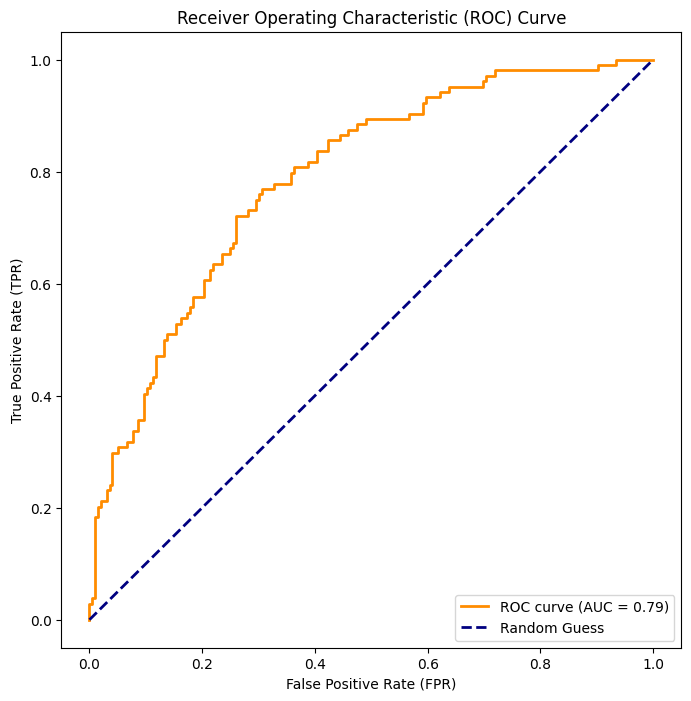

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [ ]:
y_test = y_test.reset_index(drop=True)
result_df = pd.concat([y_test, pd.Series(y_pred, name='failure_pred')], axis=1)
result_df.head(5)

,failure,failure_pred
0,0,0
1,0,0
2,1,1
3,1,0
4,1,0


In the context of machine failure prediction, false negatives (Type II errors) versus false positives (Type I errors) depends on the specific consequences. Here's a general consideration:

**False Negatives (Type II errors):**

*Importance:* False negatives occur when the model predicts that there is no failure when, in reality, there is a failure. This type of error is often considered more critical in the context of machine failure prediction.

*Consequences:* A false negative might lead to the machine experiencing an actual failure without being detected. This can result in unplanned downtime, potential damage to equipment, increased maintenance costs, and potentially more severe consequences.

**False Positives (Type I errors):**

*Importance:* False positives occur when the model predicts a failure that does not actually occur. While false positives are generally less critical than false negatives, they can still have associated costs.

*Consequences:* False positives may lead to unnecessary maintenance or inspections, causing additional costs and potentially disrupting regular operations. However, the consequences are often less severe than the potential consequences of missing an actual failure (false negative).
The choice between prioritizing false negatives or false positives often depends on the specific application and the relative costs and impacts associated with each type of error. Here are a few scenarios:

**Scenario 1:** Safety-Critical Systems (e.g., aviation, healthcare):

Priority: Minimize false negatives.

Reasoning: Missing a critical failure in safety-critical systems can have severe consequences. It is crucial to detect potential failures early to ensure the safety and reliability of the system.


**Scenario 2:** Predictive Maintenance in Manufacturing:

Priority: Balancing false negatives and false positives.

Reasoning: Achieving a balance is often essential to minimize unplanned downtime and maintenance costs. While false positives may lead to some unnecessary maintenance, missing a genuine failure (false negative) can result in more significant operational disruptions.


**Scenario 3:** Cost-Driven Environments (e.g., non-safety-critical applications):

Priority: Minimize false positives.

Reasoning: In scenarios where the cost of unnecessary maintenance is a significant concern, prioritizing the reduction of false positives may be more suitable. This minimizes unnecessary expenses associated with false alarms.

In [ ]:
# Choose a threshold based on a desired sensitivity level
desired_sensitivity = 0.8  # Going with scenario-1 (++) and 2 (+)
chosen_threshold = thresholds[np.argmax(tpr >= desired_sensitivity)]

# Binarize predictions based on the chosen threshold
y_pred_binary = (y_pred >= chosen_threshold).astype(int)

# Evaluate the model using the chosen threshold
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Display results
print(f"\n Chosen Threshold: {chosen_threshold:.2f}")
print(f"\n Accuracy: {accuracy:.2f}")
print("\n Confusion Matrix:")
print(conf_matrix)
print("\n Classification Report:")
print(classification_rep)


 Chosen Threshold: 0.31

 Accuracy: 0.70

 Confusion Matrix:
[[125  71]
 [ 20  84]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.64      0.73       196
           1       0.54      0.81      0.65       104

    accuracy                           0.70       300
   macro avg       0.70      0.72      0.69       300
weighted avg       0.75      0.70      0.70       300

